# Centrality Analysis

**Bridge Analysis**
- Type 1: Bridges that have followers from both communities
  -  Betweeness Centrality :   

- Type 2: Bridges that have followers only from one communities, and follow one or more bridges itself.
  -  Betweeness Centrality : How critical is the node in spreading information into the community where all its followers are from.
  -  Closeness Centrality : How efficient it is for information to spread from this user/node.

**Community Analysis**
- Closeness Centrality : lower the closeness indicates the more important the node is within its echo chamber. 

In [26]:
%load_ext autoreload
%autoreload 2

import json
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
sys.path.insert(0, '/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset')
import header as head
import centrality_head as ch
from itertools import islice

centrality_path = "/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Graph Construction

In [30]:
# Directed Graph based on following relation
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/follow/user_followed_by.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow/with_bridges.json") as file:
    communities = json.load(file)

G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in G.nodes(data=True) if y["at"] == "bridges"]

In [13]:
# Directed Graph based on reacting relation
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/who_reacted_by_whom.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/react/communities.json") as file:
    communities = json.load(file)

R_G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in R_G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in R_G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in R_G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in R_G.nodes(data=True) if y["at"] == "bridges"]

In [33]:
# Directed Graph based on following and reacting relation
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/react+following.json") as file:
    node_relations = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow+react/communities.json") as file:
    communities = json.load(file)

FR_G = ch.makeDiGraph(node_relations,communities)
rum = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "rumours"]
nonrum = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "non_rumours"]
uncat = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "uncategorized"]
bridges = [ x for x,y in FR_G.nodes(data=True) if y["at"] == "bridges"]

## Degree Centrality 

In degree analysis

In [ ]:
in_degree = nx.in_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=in_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=in_degree[id]
    elif id in communities["bridges"] : bridges[id]=in_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

in_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"in_degree",in_degree)

In [ ]:
inDegree = ch.degree_centrality(FR_G,"in")
head.writeToJSON(head.makePath([centrality_path,"follow+react","degree"]),"inDegree",inDegree)

Out degree analysis

In [ ]:
out_degree = nx.out_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=out_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=out_degree[id]
    elif id in communities["bridges"] : bridges[id]=out_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

out_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"out_degree_2",out_degree)


In [ ]:
outDegree = ch.degree_centrality(FR_G,"out")
head.writeToJSON(head.makePath([centrality_path,"follow+react","degree"]),"outDegree",outDegree)

## Betweeness centrality analysis

The betweeness centrality analysis is based upon non-directed graph. 

In [ ]:
bet_cen = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
rum = {}
non_rum = {}
bridges = {}

for id in list(bet_cen):
    if id in communities["rumours"] : rum[id]=bet_cen[id]
    elif id in communities["non_rumours"] : non_rum[id]=bet_cen[id]
    elif id in communities["bridges"] : bridges[id]=bet_cen[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

new_between = {
    "rumours": rum,
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"betweeness"]),"directed_betweenness",new_between)

In [3]:
bet_cen = ch.betweeness_centrality(G)
head.writeToJSON(head.makePath([centrality_path,"follow","betweeness"]),"betweeness_2",bet_cen)

In [ ]:
bet_cen = ch.betweeness_centrality(FR_G)
head.writeToJSON(head.makePath([centrality_path,"follow+react","betweeness"]),"betweeness_2",bet_cen)

## Closeness Analysis

Type 1 bridges within rumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

rum_G = nx.DiGraph()

rum_G.add_nodes_from(communities["rumours"])
rumourEdges = []
rumourNodes = communities["rumours"]

non_rumourNodes = communities["non_rumours"]

rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in non_rumourNodes: continue

    user = followed_by[id]

    for follower in user["rumours"]: 
        rumourEdges.append((follower,id))
        rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        rum_G.add_edge(follower,id)

isolates = list(nx.isolates(rum_G))
rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
rumour_closeness = nx.closeness_centrality(rum_G)
rum = {}
bridges = {}

for id in list(rumour_closeness):
    if id in communities["rumours"] : rum[id]=rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=rumour_closeness[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

rumour_closeness = {
    "rumours": rum,
    "bridges": bridges
}

head.writeToJSON(centrality_path,"rumour_closeness_2",rumour_closeness)

Type 1 bridges within nonrumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

non_rum_G = nx.DiGraph()

rumourNodes = communities["rumours"]

non_rum_G.add_nodes_from(communities["non_rumours"])
non_rumourEdges = []
non_rumourNodes = communities["non_rumours"]

non_rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in rumourNodes: continue

    user = followed_by[id]

    for follower in user["non_rumours"]: 
        non_rumourEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)

isolates = list(nx.isolates(non_rum_G))
non_rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
non_rumourNodes = set(non_rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
non_rumour_closeness = nx.closeness_centrality(non_rum_G)
non_rum = {}
bridges = {}

for id in list(non_rumour_closeness):
    if id in communities["non_rumours"] : non_rum[id]=non_rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=non_rumour_closeness[id]

# Sort each list 
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

non_rumour_closeness = {
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"closeness"]),"non_rumour_closeness",non_rumour_closeness)

## Reachable

In [5]:
# number of reachable non-rumour nodes for each bridge (with individual bridge)
R_G = nx.reverse(R_G,copy=True)
reachable = {}
print(bridges)
for b in bridges:
    reachable[b] = []
    length = nx.single_source_shortest_path_length(R_G, b)
    for node in length:
        if node != b and R_G.nodes[node]["at"] == "non_rumours":
            (reachable[b]).append(node)

head.writeToJSON(head.makePath([centrality_path,"react"]),"reachable_nr_nodes_2",reachable)
# print(reachable)

['1367531', '64643056', '15754281', '87416722', '9651232', '5402612', '51241574', '14173315', '3108351', '868112707', '28785486', '2097571', '380648579', '21749564', '718294442', '87818409', '428333', '15164565']


### Follow+React

In [ ]:
nodes = []
for x,y in FR_G.nodes(data=True):
    if y["at"] == "rumours": nodes.append(x)
    elif y["at"] == "bridges": nodes.append(x)

subGraph = FR_G.subgraph(nodes)

closeness = ch.closeness_centrality(subGraph)
head.writeToJSON(head.makePath([centrality_path,"follow+react","closeness"]),"rumours+bridges",closeness)

In [24]:
# number of reachable non-rumour nodes for each bridge
nodes = []
bridges = []
for x,y in FR_G.nodes(data=True):
    if y["at"] == "non_rumours": nodes.append(x)
    elif y["at"] == "bridges": nodes.append(x); bridges.append(x)

subGraph = FR_G.subgraph(nodes)
subGraph = subGraph.reverse(copy=True)
reachable = {}
for n in bridges:
    length = nx.single_source_shortest_path_length(subGraph, n)
    reachable[n] = [node for node in length if n!=node and not(node in bridges)]
    # print(f"{n}: {reachable[n]}")

head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"reachable_nr_nodes",reachable)

## Visualization

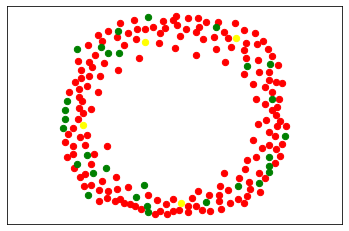

In [6]:
# General Display of rumour, non-rumour, and uncategorized communities
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/communities.json") as file:
    communities  = json.load(file)

gen_G = nx.DiGraph()
attributes = {}
for com, ids in communities.items():
    gen_G.add_nodes_from(ids)
    for id in ids:
        attributes[id]=com

nx.set_node_attributes(gen_G,attributes,"at")

pos = nx.spring_layout(gen_G, k=1, iterations=20)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="rumours"],node_color="red",node_size=40)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="non_rumours"],node_color="green",node_size=40)
nx.draw_networkx_nodes(gen_G,pos,nodelist=[x for x,y in gen_G.nodes(data=True) if y["at"]=="uncategorized"],node_color="yellow",node_size=40)

x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

ax = plt.subplots()

plt.show() 


## HITS

In [12]:
# Follow Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow/with_bridges.json") as file:
    communities = json.load(file)

G.remove_nodes_from(list(nx.isolates(G)))    
h,a = ch.HITS(G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"


head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"follow","hits"]),"HITS_com",dic)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [5]:
# React Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/react/communities.json") as file:
    communities = json.load(file)

h,a = ch.HITS(R_G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"


head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"react","hits"]),"HITS_com",dic)

In [39]:
# Follow+React Graph
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/follow+react/communities.json") as file:
    communities = json.load(file)

h,a = ch.HITS(FR_G,100)

dic = {
    "hub":{},
    "authority":{}
}

hub = dic["hub"]
aut = dic["authority"]

for id in h:
    if id in communities["rumours"]: hub[id] = "rumours"
    if id in communities["non_rumours"]: hub[id] = "non_rumours"
    if id in communities["bridges"]: hub[id] = "bridges"
    if id in communities["uncategorized"]: hub[id] = "uncategorized"

for id in a:
    if id in communities["rumours"]: aut[id] = "rumours"
    if id in communities["non_rumours"]: aut[id] = "non_rumours"
    if id in communities["bridges"]: aut[id] = "bridges"
    if id in communities["uncategorized"]: aut[id] = "uncategorized"

head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"hub",h)
head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"authority",a)
head.writeToJSON(head.makePath([centrality_path,"follow+react"]),"HITS_com",dic)